hotel: The type of hotel, either "City Hotel" or "Resort Hotel.", resort = vacances

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate. combien gagne l'hotel, pour la journée donnée, par chambre

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. (Not Real)

email: Guest's email address.(Not Real)

phone-number: Guest's phone number. (Not Real)

credit_card: Guest's credit card details. (Not Real)

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from fct import *
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../hotel_bookings.csv", sep=",")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Cleaning

### NaN and select columns

In [3]:
colonne_a_garder = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "reservation_status_date", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests"]
df = df[colonne_a_garder]
df.dropna(inplace=True)
df.drop_duplicates(subset=colonne_a_garder, inplace=True)
print(df.isnull().sum())



hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
reservation_status_date           0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


## type of columns (date, ...)

In [4]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

df['reservation_status_date'] = pd.to_datetime(df.reservation_status_date)
df['reservation_day'] = df['reservation_status_date'].dt.day
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_year'] = df['reservation_status_date'].dt.year

df_temporel = df.copy()
df_temporel.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month', 'reservation_day', 'reservation_month', 'reservation_year'], axis=1, inplace=True)
df.drop(["arrival_date"], axis=1, inplace=True)
df.drop(["reservation_status_date"], axis=1, inplace=True)

df['arrival_date_year'] = df['arrival_date_year'] - 2015
df['reservation_year'] = df['reservation_year'] - 2015
print(df.head())
# print(df_temporel.head())



          hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342                  0   
1  Resort Hotel            0        737                  0   
2  Resort Hotel            0          7                  0   
3  Resort Hotel            0         13                  0   
4  Resort Hotel            0         14                  0   

   arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
0                   7                          1                        0   
1                   7                          1                        0   
2                   7                          1                        0   
3                   7                          1                        0   
4                   7                          1                        0   

   stays_in_week_nights  adults  children  ...  booking_changes deposit_type  \
0                     0       2       0.0  ...                3   No Deposit   
1   

## nettoyage données valeurs aberrantes (var quanti), modalité seule (var quali)

In [5]:
columns_to_filter_quanti = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces"]
columns_to_filter_quali = ["reserved_room_type", "assigned_room_type"]

# Filter variables quanti
for column in columns_to_filter_quanti:
    df = filter_occurence_variable(df, column, 10)
    df_temporel = filter_occurence_variable(df_temporel, column, 10)

# Filter variables quali
for column in columns_to_filter_quali:
    df = filter_occurence_variable(df, column, 10)
    df_temporel = filter_occurence_variable(df_temporel, column, 10)

df = df[df['meal'] != "Undefined"]
df_temporel = df_temporel[df_temporel['meal'] != "Undefined"]

## Encodage One-hot pour algo machine learning

In [6]:
col_quali = ["hotel", "meal", "country", "market_segment", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
df_encoded = pd.get_dummies(df, columns=col_quali, dtype=int)
# df_encoded.drop(["arrival_date"], axis=1, inplace=True)
for col in df_encoded.columns:
    if df_encoded[col].dtype != "float64":
        df_encoded[col] = df_encoded[col].astype('int64')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68705 entries, 0 to 119389
Columns: 230 entries, is_canceled to customer_type_Transient-Party
dtypes: float64(2), int64(228)
memory usage: 121.1 MB


## Standardiser ou normaliser les variables quantitatives

In [7]:
# df = standardisation(df)
# df_encoded = standardisation(df_encoded)
df['lead_time'] = np.log(df['lead_time'] + 1)
df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month'] + 1)
df['adr'] = np.log(df['adr'] + 1)

df_temporel['lead_time'] = np.log(df_temporel['lead_time'] + 1)
df_temporel['adr'] = np.log(df_temporel['adr'] + 1)

df_encoded['lead_time'] = np.log(df_encoded['lead_time'] + 1)
df_encoded['arrival_date_day_of_month'] = np.log(df_encoded['arrival_date_day_of_month'] + 1)
df_encoded['reservation_day'] = np.log(df_encoded['reservation_day'] + 1)
df_encoded['adr'] = np.log(df_encoded['adr'] + 1)


# Analyse exploratoire

## Carte choroplèthe

In [ ]:
import plotly.express as px

# Créer un DataFrame avec le nombre d'annulations par pays
df_cancelled = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='num_cancellations')

# Créer la carte choroplèthe
fig = px.choropleth(df_cancelled, locations='country',
                    color='num_cancellations',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.PuBu,
                    title='Nombre d\'annulations par pays',
                    labels={'num_cancellations':'Nombre d\'annulations'})

fig.update_layout(width=800, height=600)

fig.show()


# Modèles de prédictions

## Régression logistique

bonne accuracy: pas dû à distribution_channel, pas dû au fait qu'il y a + de données (sans enlever doublons et occurences min) 

Raison: reservation_status permet de passer de 0.82 d'accuracy à 1

mettre la date de réservation permet de passer de 0.82 à 0.90

Je pense qu'il esy mieux de mettre toutes les colonnes pour un modèle

Scores de validation croisée : [0.86762244 0.85685176 0.88326905 0.9037188  0.87824758]
Moyenne des scores de validation croisée : 0.88
Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9910
           1       0.94      0.71      0.80      3831

    accuracy                           0.90     13741
   macro avg       0.92      0.84      0.87     13741
weighted avg       0.91      0.90      0.90     13741



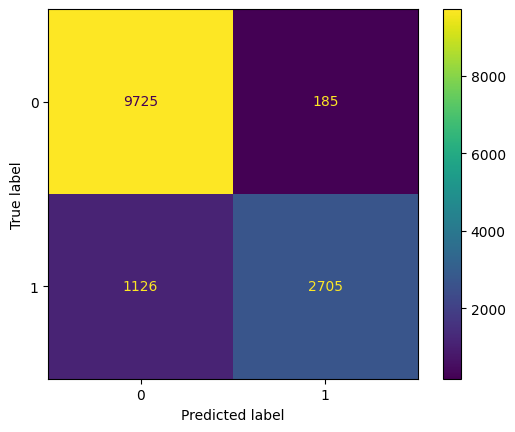

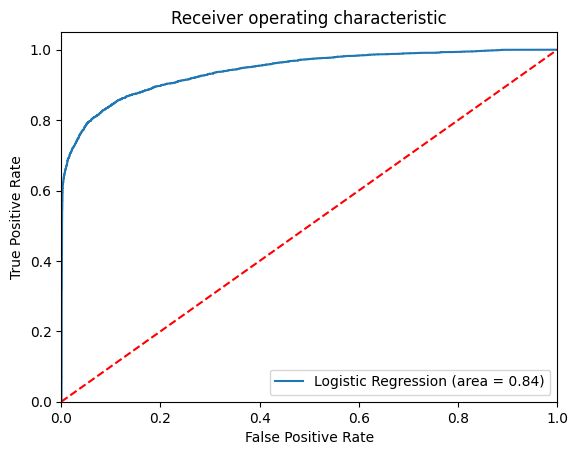

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=5)
print('Scores de validation croisée :', scores)
print('Moyenne des scores de validation croisée : {:.2f}'.format(scores.mean()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_).plot()
print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

## Méthode de Boosting

On va essayer de voir quellee méthode de Boosting je vais appliquer sur mes données entre XGBoost, CatBoost, Gradient Boosting ou AdaBoost

Chaque algorithme de boosting a ses propres forces et faiblesses, et le choix entre eux dépend souvent du contexte spécifique. Voici quelques considérations générales :

1. **AdaBoost** : AdaBoost est l'un des premiers algorithmes de boosting. Il est simple et efficace, mais il est aussi plus sensible aux valeurs aberrantes et au surapprentissage que d'autres méthodes de boosting. De plus, AdaBoost peut être plus lent à entraîner que des méthodes plus récentes comme XGBoost ou CatBoost.

2. **Gradient Boosting** : Le Gradient Boosting est une amélioration de AdaBoost qui utilise la descente de gradient pour minimiser l'erreur. Il est généralement plus performant que AdaBoost, mais il peut aussi être sujet au surapprentissage si le nombre d'itérations (ou "arbres") est trop élevé. De plus, comme AdaBoost, il peut être plus lent à entraîner que XGBoost ou CatBoost.

3. **XGBoost** : XGBoost est une implémentation optimisée du Gradient Boosting qui est conçue pour être très efficace et flexible. Il a tendance à être plus rapide et à donner de meilleurs résultats que AdaBoost ou le Gradient Boosting standard. Cependant, XGBoost peut être plus difficile à calibrer car il a de nombreux hyperparamètres.

4. **CatBoost** : CatBoost est un algorithme de boosting qui a été spécialement conçu pour gérer les variables catégorielles. Si votre jeu de données contient de nombreuses variables catégorielles, CatBoost peut être une bonne option. Cependant, comme XGBoost, CatBoost a de nombreux hyperparamètres et peut être plus difficile à calibrer.

En résumé, si votre jeu de données contient de nombreuses valeurs aberrantes ou si vous êtes préoccupé par le surapprentissage, vous pourriez vouloir éviter AdaBoost. Si votre jeu de données est très grand et que le temps d'entraînement est une préoccupation, vous pourriez vouloir éviter AdaBoost et le Gradient Boosting standard en faveur de XGBoost ou CatBoost. Si votre jeu de données contient de nombreuses variables catégorielles, CatBoost pourrait être une bonne option. Enfin, si la simplicité et l'interprétabilité sont des préoccupations, vous pourriez vouloir choisir AdaBoost ou le Gradient Boosting standard plutôt que XGBoost ou CatBoost.

Par simplicité, nous préfèrerions Gradient Boosting, qui est meilleure que AdaBoost. Cependant, XGBoost offre de bons résultats, CatBoost aussi mais pour CatBoost, on a déjà encoder les variables donc sa principale utilité est futile.

Pour l'instant, nous allons juste utiliser la méthode Random Forest

### Random Forest

Accuracy of random forest classifier on test set: 0.90


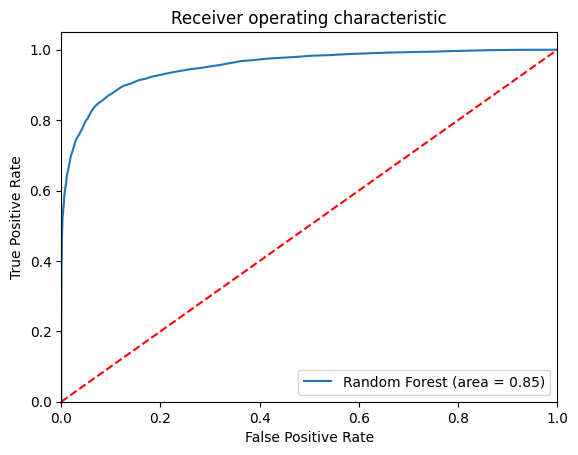

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Rf_ROC')
plt.show()



### Gradient Boosting

Accuracy of gradient boosting classifier on test set: 0.90


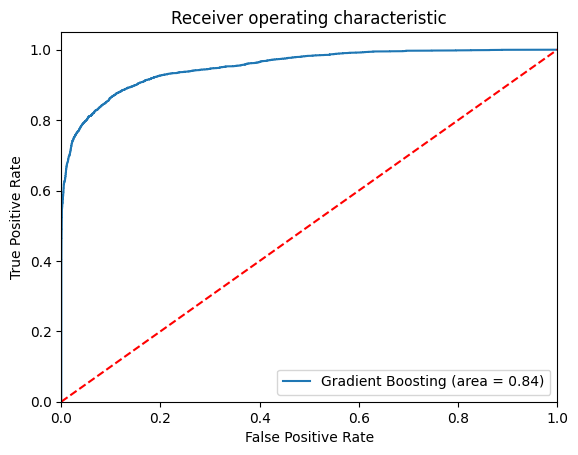

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_gb)))

gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Gb_ROC')
plt.show()


## ANN

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


# Rest of the code
X = df_encoded.drop('is_canceled', axis=1)
y = to_categorical(df_encoded['is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
epochs = 10

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = epochs)

Epoch 1/10
1718/1718 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.8874 - val_loss: 0.2310 - val_accuracy: 0.9134
Epoch 2/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.1587 - accuracy: 0.9455 - val_loss: 0.1303 - val_accuracy: 0.9526
Epoch 3/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.1349 - accuracy: 0.9535 - val_loss: 0.1144 - val_accuracy: 0.9607
Epoch 4/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9581 - val_loss: 0.1312 - val_accuracy: 0.9547
Epoch 5/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.1142 - accuracy: 0.9608 - val_loss: 0.1418 - val_accuracy: 0.9534
Epoch 6/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9637 - val_loss: 0.0927 - val_accuracy: 0.9697
Epoch 7/10
1718/1718 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9666 - val_loss: 0.0954 - val_accuracy:

In [54]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, epochs + 1)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

## CNN

In [55]:
from keras.layers import Conv1D, Flatten
from keras.utils import to_categorical

X = df_encoded.drop('is_canceled', axis=1)
y = to_categorical(df_encoded['is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
epochs = 2

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/2
1718/1718 [==============================] - 24s 13ms/step - loss: 0.3731 - accuracy: 0.8394 - val_loss: 0.3045 - val_accuracy: 0.8825
Epoch 2/2
1718/1718 [==============================] - 26s 15ms/step - loss: 0.2470 - accuracy: 0.9103 - val_loss: 0.2273 - val_accuracy: 0.9334


In [56]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(1, epochs + 1)

accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')
